In [44]:
from __future__ import division
import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA

import pdb
import matplotlib.pyplot as plt

In [45]:
#import custom functions
#harmonic is assignment function
#sol_frame indexes array same as matlab

from harmonic import *
from sol_frame import *

In [254]:
#set up frame

#BC values for x
x0=-4
xN=4

delta_x = 0.1
x_frame = sol_frame(x0, xN, delta_x)
K = 1

In [283]:
#set up matrix A
a_dim = (len(x_frame), len(x_frame))
A = np.zeros(a_dim)

len(A)

81

In [284]:
#add middle terms to matrix for central difference
for i in range(0, len(A)):
    #calculate x value at i
    x = x_frame[i]

    A[i:(i+1),(i-1):i] = -1
    A[i:(i+1),i:(i+1)] = 2+K*(x**2)*delta_x**2
    A[i:(i+1),(i+1):(i+2)] = -1

In [285]:
#Set up forward difference in first row
#pin first phi value to zero?
#A[0:1,0:1] = 0 #-2
#A[0:1,1:2] = 5 #+K*(x0**2)*delta_x**2
#A[0:1,2:3] = -4
#A[0:1,3:4] = 1

#set up backward difference in last row
#a = len(A)
#pin last value to phi val to 0?
#A[a-1:a,a-1:a] = 0 #-2
#A[a-1:a,a-2:a-1] = 5 #+K*(xN**2)*delta_x**2
#A[a-1:a,a-3:a-2] = -4
#A[a-1:a,a-4:a-3] = 1

In [286]:
#np.savetxt('A.csv',A, delimiter=',')
A = A[1:80,1:80]
len(A)

79

In [288]:
LA.eigvals(A)

array([4.07461398, 4.0746138 , 4.02384703, 4.02355095, 3.99867588,
       3.98941432, 3.97124098, 3.95008664, 3.92542986, 3.89758689,
       3.86670178, 3.83288325, 3.79622199, 3.75680013, 3.71469611,
       3.66998741, 3.62275212, 3.57306991, 3.52102255, 3.46669429,
       3.410172  , 3.35154531, 3.29090661, 3.22835098, 3.1639762 ,
       3.09788261, 3.03017302, 2.81841087, 2.89032874, 2.96095261,
       2.74531036, 2.67114035, 2.59601557, 2.52005218, 2.36608036,
       2.44336761, 2.28830984, 2.21017621, 2.13180016, 2.05330274,
       1.9748052 , 1.89642878, 1.74052315, 1.66323476, 1.81829454,
       1.58654878, 0.00999376, 0.02996901, 0.04992266, 0.06987695,
       0.08993201, 1.5105837 , 1.43545693, 1.36128461, 0.11038342,
       0.13180538, 0.15493551, 0.18040802, 1.21626054, 1.14563325,
       0.27351124, 0.23962307, 1.07640897, 0.31021123, 0.34965853,
       1.00869504, 0.94259659, 0.39178166, 0.48375472, 0.87821637,
       0.53344873, 0.58550659, 0.63984425, 0.69637495, 0.75500

In [219]:
eig1 = eig_vals[0]
eig2 = eig_vals[1]
eig3 = eig_vals[2]
eig4 = eig_vals[3]
eig5 = eig_vals[4]

In [220]:
eig1

0.009993756327949474

In [221]:
eig2

0.02996901366441575

In [298]:
k=1
En = eig_vals[1]
p = [k, En]
y0 = [0,1]
#solve ODE
sol = integrate.odeint(harmonic, y0, x_frame, args=(p,))
y1a = sol[:,0:1]
y2a = sol[:,1:2]
En

0.02996901366441575

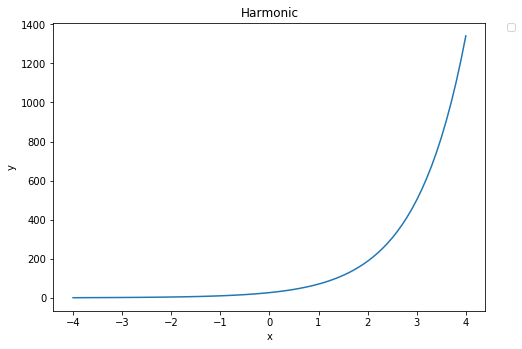

In [299]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, y1a, label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [297]:
tol = 0.2

for i in range(0,len(eig_vals)):
    #solve ODE
    p=[k,eig_vals[i]]
    sol = integrate.odeint(harmonic, y0, x_frame, args=(p,))

    y1a = sol[:,0:1]
    
    if abs(y1a[len(y1a)-1]) < tol:
        print i
        print y1a[len(y1a)-1]
    

43
[0.06361619]
44
[-0.15428844]
57
[-0.19182267]
58
[-0.0940844]
59
[-0.0011462]
60
[0.08527337]
61
[0.16403645]
